# Iris classify with Perceptron model algorithm
<br>
2021/09/10
<br>
code origin by Python機械学習プログラミング第3版, written by rum

In [1]:
import os
import pandas as pd 

In [2]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases','iris', 'iris.data')
print('URL', s)

URL https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Plot the data

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values

# Iris-setosaを-1, Iris-versicolorを1に変換
y = np.where(y=='Iris-setosa', -1, 1)

# 1 = 100行目の1, 3列目の抽出
X = df.iloc[0:100, [0, 2]].values

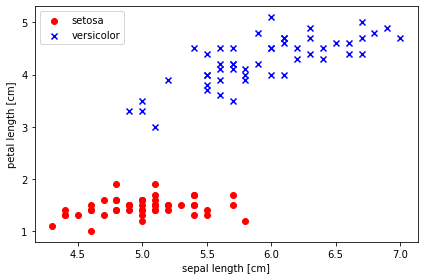

In [6]:
# plot setosa
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

# plot versicolor
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

# label setting
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

# legend setting
plt.legend(loc='upper left')
plt.tight_layout()

# show
plt.show()


## Train perceptron algorithm


In [7]:
from classify.perceptron import Perceptron

In [8]:
# gen perceptron object
ppn = Perceptron(eta=0.1, n_iter=10)

# apply data as training data to perceptron model
ppn.fit(X, y)

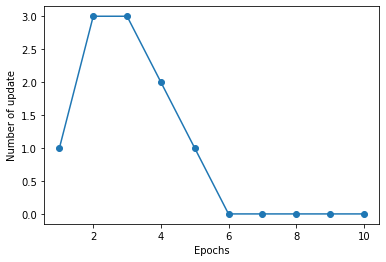

In [9]:
# Line plot shows relation ship between epochs and errors
plt.plot(range(1, len(ppn.errors_)+ 1), ppn.errors_, marker='o')
# axis label setting
plt.xlabel('Epochs')
plt.ylabel('Number of update')
# show
plt.show()


## Plot decision boundary

In [10]:
from classify.plot.decision_regions import plot_decision_regions

/Users/rum/Documents/ml_python_book/classify/plot/decision_regions.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


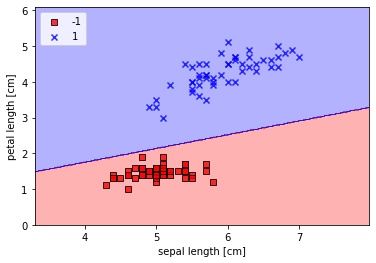

In [11]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
